# Introduction to visualization with Python -- basic and customized plotting

## Learning outcomes


By the end of this chapter, you will be able to:
* Describe and manipulate pandas dataframe
* Use basic functionalities of pandas dataframe
* Use Matplotlib and Pandas for creating distributional plots
* Use Seaborn for rendering visually more appealing plots

## Introduction

Data visualization is the art and science of telling captivating stories with data. Today’s developers and data scientists, irrespective of their operational domain, agree that communicating insights effectively using data visualization is very important. 

Data scientists are always looking for better ways to communicate their findings through captivating visualizations. Depending on their domain, the type of visualization varies, and oftentimes, this means employing specific libraries and tools that will best suit the visualization needs. Thus, developers and data scientists are looking for a comprehensive resource containing quick actionable information on this topic.

Despite Python being a pet programming language for the modern data scientists, there is no single resource at present which provides a comprehensive guide to interactive data visualization using Python. Resources for learning interactive data visualization are scarce. Moreover, the available materials either deal with tools other than Python (e.g. Tableau), or focus on a single Python library for visualization. This course is designed to be accessible for anyone well-conversant with Python.

Why Python? While most languages have associated packages and libraries built specifically for visualization tasks, Python is uniquely empowered to be a convenient tool for data visualization. Python performs advanced numerical and scientific computations with libraries such as numpy and scipy, hosts a wide array of machine learning methods owing to the scikit-learn package, provides a great interface for big data manipulation due to the availability pandas package and its compatibility with Apache Spark, and generates aesthetically pleasing plots and figures with libraries such as seaborn, plotly, and more.

The course will demonstrate the principles and techniques of effective interactive visualization through relatable case studies, and aims to enable the reader to become confident in creating their own context-appropriate interactive data visualizations using Python. 

Before diving into the different visualization types and introducing interactivity features (which, as we will see in this course, will play a very helpful role in certain scenarios), it is essential to be go through the basics, especially with the pandas and seaborn libraries which are popularly used in python for data handling and visualization. 

This lesson serves as a refresher and one-stop resource for reviewing these basics. Specifically, it illustrates creating and handling of pandas dataframes, basics of plotting with pandas and seaborn, and tools for manipulating plotting style and enhancing the visual appeal of your plots.

### Prerequisites 

Python has several libraries with many inter-dependencies. While one way is to install each library as need arises, another way is to use a distribution which bundles several most useful data science and machine learning libraries into one. [Anaconda](https://www.anaconda.com/distribution/) is one such open-source distribution. Unless one is on a very low resource computer, this would be a one stop solution. 

In case you are unable to install conda, please make sure that you have Python 3.5+ and the following libraries installed: 
- seaborn (>= 0.9)
- numpy (>= 1.9.3)
- scipy (>= 0.14.0)
- matplotlib (>= 1.4.3)
- pandas (>= 0.15.2)
- statsmodels (>= 0.5.0)
- plotly (>=3.3.0)

## Handling data with pandas dataframes

The pandas library is an extremely resourceful open-source toolkit for handling, manipulating, and analyzing structured data. Data tables can be stored in the dataframe object available in pandas and data in multiple formats (e.g. csv, tsv, xlsx, json) can be read directly into the dataframe. Utilizing in-built functions, dataframes can be efficiently manipulated (e.g. converting tables between different views - long/wide, grouping by a specific column/feature, summarizing the data etc).

### Reading data from files

Most small to medium sized datasets are usually available or shared as delimited files such as comma separated values (csv), tab separated values (tsv), Excel (xslx), JSON. Pandas provides built-in I/O functions to read files in several formats -- ``read_csv``, ``read_excel``, ``read_json``, ``...`` into a dataframe. In this section, we will use the 'diamonds' dataset.

#### Exercise 1: Reading data from files

In this exercise, we will learn how to read from a dataset. The example used here is a ‘diamonds’ dataset.
1. Load pandas and seaborn libraries.

In [1]:
#Load pandas library
import pandas as pd 
import seaborn as sns

2. Specify the path of the dataset.

In [2]:
#URL of the dataset (acknowledgement to Michael Waskom who hosted this data in his github repo)
diamonds_url = "https://raw.githubusercontent.com/mwaskom/seaborn-data/master/diamonds.csv"

3. Read files from the url into the pandas dataframe.

In [3]:
#Yes, we can read files from a URL straight into a pandas dataframe!
diamonds_df = pd.read_csv(diamonds_url)

# Since the dataset is available in seaborn, we can alternatively read it in using the following line of code
diamonds_df = sns.load_dataset('diamonds')

The same syntax can be followed for other datatypes using appropriate `read_` functions. If only specific columns need to be read, the parameter `usecols` can be used as below. 

In [4]:
diamonds_df_specific_cols = pd.read_csv(diamonds_url, usecols=['carat','cut','color','clarity'])

### Observing and describing the data

Pandas also offers a way to view the first few rows in a dataframe using ``head()``. By default, it shows 5 rows. To adjust that, we can use the argument `n` -- for instance, ``head(n=5)``.

In [5]:
diamonds_df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


The data contains different features of diamonds such as `carat`, `cut` quality, `color`, `price` etc  as columns . Cut, clarity and colour are categorical variables and x, y, z, depth, table, and price are continuous variables. While categorical variables take unique categories/names as values, continuous values take real numbers as values.
 
Cut, colour and clarity are ordinal variables with 5, 7 and 8 unique values respectively. The cut is the quality of the cut described as Fair, Good, Very Good, Premium, Ideal. Color describes the diamond colour from J (worst) to D (best). Clarity measures how clear the diamond is -- I1 (worst), SI1, SI2, VS1, VS2, VVS1, VVS2, IF (best).

We can count the number of rows and columns in the dataframe using `shape`.

In [6]:
diamonds_df.shape

(53940, 10)

The first number `53940` denotes the number of rows and the second `10` denotes the number of columns.

We can summarise the columns using `describe()` to obtain the distribution of variables including mean, median, min, max, and different quartiles.  

In [7]:
diamonds_df.describe()

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


This works for continuous variables. However, for categorical variables, we need to use the parameter `include=object`.

In [8]:
diamonds_df.describe(include=object)

,cut,color,clarity
count,53940,53940,53940
unique,5,7,8
top,Ideal,G,SI1
freq,21551,11292,13065


Now what if you would want to see the column types and how much memory a dataframe occupies? Use `info()`.

In [9]:
diamonds_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
carat      53940 non-null float64
cut        53940 non-null object
color      53940 non-null object
clarity    53940 non-null object
depth      53940 non-null float64
table      53940 non-null float64
price      53940 non-null int64
x          53940 non-null float64
y          53940 non-null float64
z          53940 non-null float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB


### Selecting columns from dataframes

A column in a pandas dataframe can be accessed in two simple ways. With the '.' operator or the '[ ]' operator. For example, we can access the column 'cut' of the dataframe diamonds_df with `diamonds_df.cut` or `diamonds_df['cut']`. However, there are some scenarios where the '.' operator cannot be used:
- when the column name contains spaces
- when the column name is an integer
- when creating a new column

Now, how about selecting all rows corresponding to diamonds which have the 'Ideal' cut and storing them in a separate dataframe? We can select them using the `loc` functionality.

In [10]:
diamonds_low_df = diamonds_df.loc[diamonds_df['cut']=='Ideal']

Here, we obtain indices of rows which meet the criterion: `diamonds_df['price_per_carat_is_high']==1` and then select them using `loc`. 

### Adding new columns to dataframes

#### Simple addition of columns

We can add a column, for instance `price_per_carat` in the diamonds dataframe. We can divide the values of two columns and populate the data fields of the newly added column.

In [11]:
diamonds_df['price_per_carat'] = diamonds_df['price']/diamonds_df['carat']

Lets look at the dataframe head to check if the new column was added as expected. 

In [12]:
diamonds_df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z,price_per_carat
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43,1417.391304
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31,1552.380952
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31,1421.739130
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63,1151.724138
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75,1080.645161


Similarly, we can also use addition, substraction and other mathematical operators on two numeric columns. 

#### Conditional addition of columns

Now, lets try and add a column based on the value in `price_per_carat`, say anything more than 3500 as high (coded as 1) and others as low (coded as 0). One of the ways to do this is through using functions in python's `numpy` package. 

In [13]:
#Import numpy package for linear algebra
import numpy as np

diamonds_df['price_per_carat_is_high'] = np.where(diamonds_df['price_per_carat']>3500,1,0)

### Applying functions on dataframe columns

#### Simple functions
Consider a scenario where the price of diamonds has increased and we want to apply an increment factor of 1.3 to the price of all the diamonds in our record. This can be done simply as follows:

In [14]:
diamonds_df['price']=diamonds_df['price']*1.3

Similarly, one can apply other simple functions on a dataframe column -- addition, subtraction, division, squaring or raising to an exponent, etc.

#### Function on single column in each row

It is also possible to apply more complex functions on pandas dataframe columns. As an example, let us say we want to round off the price of diamonds to its ceil (nearest integer equal to or higher than the actual price).

In [15]:
import math
diamonds_df['rounded_price']=diamonds_df['price'].apply(math.ceil)
diamonds_df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z,price_per_carat,price_per_carat_is_high,rounded_price
0,0.23,Ideal,E,SI2,61.5,55.0,423.8,3.95,3.98,2.43,1417.391304,0,424
1,0.21,Premium,E,SI1,59.8,61.0,423.8,3.89,3.84,2.31,1552.380952,0,424
2,0.23,Good,E,VS1,56.9,65.0,425.1,4.05,4.07,2.31,1421.739130,0,426
3,0.29,Premium,I,VS2,62.4,58.0,434.2,4.20,4.23,2.63,1151.724138,0,435
4,0.31,Good,J,SI2,63.3,58.0,435.5,4.34,4.35,2.75,1080.645161,0,436


In this case, the function we wanted, i.e. rounding off to the ceil was already present in an existing library. However, there might be times when you have to write your own function for performing the task you want to accomplish. In case of small functions, you can also use the lambda operator, which acts as a one-liner function taking an argument. For example, say you want to add another column to the dataframe indicating the rounded off price of the diamonds to the nearest multiple of 100 (equal to or higher than the price). This can be done using the lambda function as below:

In [16]:
import math
diamonds_df['rounded_price_to_100multiple']=diamonds_df['price'].apply(lambda x: math.ceil(x/100)*100)
diamonds_df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z,price_per_carat,price_per_carat_is_high,rounded_price,rounded_price_to_100multiple
0,0.23,Ideal,E,SI2,61.5,55.0,423.8,3.95,3.98,2.43,1417.391304,0,424,500
1,0.21,Premium,E,SI1,59.8,61.0,423.8,3.89,3.84,2.31,1552.380952,0,424,500
2,0.23,Good,E,VS1,56.9,65.0,425.1,4.05,4.07,2.31,1421.739130,0,426,500
3,0.29,Premium,I,VS2,62.4,58.0,434.2,4.20,4.23,2.63,1151.724138,0,435,500
4,0.31,Good,J,SI2,63.3,58.0,435.5,4.34,4.35,2.75,1080.645161,0,436,500


Of course, not all functions can be written as one-liners and it is important to know how to include user-defined functions in the apply function. Let us write the same code with a user-defined function for illustration:

In [17]:
import math

def get_100_multiple_ceil(x):
    y = math.ceil(x/100)*100
    return y
    
diamonds_df['rounded_price_to_100multiple']=diamonds_df['price'].apply(get_100_multiple_ceil)
diamonds_df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z,price_per_carat,price_per_carat_is_high,rounded_price,rounded_price_to_100multiple
0,0.23,Ideal,E,SI2,61.5,55.0,423.8,3.95,3.98,2.43,1417.391304,0,424,500
1,0.21,Premium,E,SI1,59.8,61.0,423.8,3.89,3.84,2.31,1552.380952,0,424,500
2,0.23,Good,E,VS1,56.9,65.0,425.1,4.05,4.07,2.31,1421.739130,0,426,500
3,0.29,Premium,I,VS2,62.4,58.0,434.2,4.20,4.23,2.63,1151.724138,0,435,500
4,0.31,Good,J,SI2,63.3,58.0,435.5,4.34,4.35,2.75,1080.645161,0,436,500


#### Exercise: Function on multiple columns

When applying a function on multiple columns of a dataframe, we can similarly use lambda or user-defined functions. Let us go through an exercise to understand this concretely.

We will continue to use the diamonds dataset. Suppose we are interested in buying diamonds which are Ideal cut and color D (entirely colorless). The exercise is to add a new column 'desired' to the dataframe which is 'yes' if our criteria are satisfied and 'no' if not satisfied. 

1. Import the necessary modules.

In [18]:
import seaborn as sns
import pandas as pd

2. Import the diamonds dataset.

In [19]:
diamonds_df_exercise = sns.load_dataset('diamonds')

3. Write a function to determine if a record 'x' is desired or not.

In [20]:
def is_desired(x):
    bool_var = 'yes' if (x['cut']=='Ideal' and x['color']=='D') else 'no'
    return bool_var

4. Use the apply function to add the new column 'desired'.

In [21]:
diamonds_df_exercise['desired']=diamonds_df_exercise.apply(is_desired, axis=1)
diamonds_df_exercise.head()

,carat,cut,color,clarity,depth,table,price,x,y,z,desired
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43,no
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31,no
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31,no
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63,no
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75,no


The new column 'desired' is added!

### Deleting columns from dataframe

Finally, let's see how to delete columns from a pandas dataframe. For example, we will delete the columns rounded_price, rounded_price_to_100multiple.

In [22]:
diamonds_df=diamonds_df.drop(columns=['rounded_price', 'rounded_price_to_100multiple'])
diamonds_df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z,price_per_carat,price_per_carat_is_high
0,0.23,Ideal,E,SI2,61.5,55.0,423.8,3.95,3.98,2.43,1417.391304,0
1,0.21,Premium,E,SI1,59.8,61.0,423.8,3.89,3.84,2.31,1552.380952,0
2,0.23,Good,E,VS1,56.9,65.0,425.1,4.05,4.07,2.31,1421.739130,0
3,0.29,Premium,I,VS2,62.4,58.0,434.2,4.20,4.23,2.63,1151.724138,0
4,0.31,Good,J,SI2,63.3,58.0,435.5,4.34,4.35,2.75,1080.645161,0


Note regarding 'apply' and 'drop' functions on pandas dataframes: By default, when the apply or drop function is used on a pandas dataframe, the original dataframe is NOT modified. Rather, a copy of the dataframe post modifications is returned by the functions. Therefore, one should assign the returned value back to the variable containing the dataframe (e.g. `diamonds_df=diamonds_df.drop(columns=['rounded_price', 'rounded_price_to_100multiple'])`). In case of the drop function, there is also a provision to avoid the assignment by setting a parameter `inplace=True` wherein the function performs the column deletion on the original datafram and does not return anything.

### Writing a dataframe to file

Lastly, let us see how to write our dataframe to a file.

#### Exercise 4: Writing dataframe to a file.

In this exercise, we will learn how to write a dataframe to a .csv file.
1. Write the diamonds dataset into a .csv file. 

In [23]:
diamonds_df.to_csv('diamonds_modified.csv')

Lets look at the first few rows of the dataframe.

In [24]:
print(diamonds_df.head())

   carat      cut color clarity  depth  table  price     x     y     z  \
0   0.23    Ideal     E     SI2   61.5   55.0  423.8  3.95  3.98  2.43   
1   0.21  Premium     E     SI1   59.8   61.0  423.8  3.89  3.84  2.31   
2   0.23     Good     E     VS1   56.9   65.0  425.1  4.05  4.07  2.31   
3   0.29  Premium     I     VS2   62.4   58.0  434.2  4.20  4.23  2.63   
4   0.31     Good     J     SI2   63.3   58.0  435.5  4.34  4.35  2.75   

   price_per_carat  price_per_carat_is_high  
0      1417.391304                        0  
1      1552.380952                        0  
2      1421.739130                        0  
3      1151.724138                        0  
4      1080.645161                        0  


By default, the to_csv function outputs a file which includes column headers as well as row numbers. Generally, the row numbers are not desirable, and a parameter 'index' is used to exclude them.

In [25]:
diamonds_df.to_csv('diamonds_modified.csv', index=False)

And that's it! You are now equipped to perform all the basic functions on pandas dataframes required to get started with data visualization in python.

### Topic Summary

In order to prepare the ground for using various visualization techniques, we went the following different aspects of handling pandas dataframes:

- reading data from files: using function read_csv( ), read_excel( ), read_json( )_
- observing and describing data: using functions _dataframe.head( ), dataframe.tail( ), dataframe.describe( ), dataframe.info( )_
- selecting columns: using notations _dataframe.column__name_ or _dataframe['column__name']_
- adding new columns: using notation _dataframe['new__column__name']=..._
- applying functions to existing columns: using function _dataframe.apply(func)_
- deleting columns from dataframes: using function _dataframe.drop(column_list)
- writing dataframes to files: using function _dataframe.to_csv()_

These functions are useful in preparing the data in a format suitable for input to visualization functions in python libraries such as seaborn.

### Assessment Questions

Which of the following accurately describes the apply function?:
- returns the original dataframe which is modified as per the function mentioned in the apply function
- returns a copy of the dataframe which is modified as per the function mentioned in the apply function
- modifies the original dataframe as per the function specified in the apply function and returns null
- none of the above

answer: b

Which of the following statements is false:
- The drop function returns null when the inplace parameter is set to True
- By default, the drop function returns a copy of the original dataframe sans the columns specified in the argument
- When adding a new column to pandas dataframe 'df', the notation df.column_name can be used
- The function specified as an argument to the apply function can be user-defined or built-in from existing python libraries

answer: c

The function for summarizing statistics on numerical features in a pandas dataframe 'df' is:
- df.summarise()
- df.stats()
- df.info()
- df.describe()

answer: d

## Plotting with pandas and seaborn

Now that we got a basic sense of how to load and handle data in pandas dataframe object, let's get started with making some simple plots on this data. While there are several plotting libraries in python (matplotlib, plotly, seaborn etc), in this lesson, we will mainly explore the pandas and seaborn libraries, which are extremely useful, popular, and easy-to-use.

### Creating simple plots to visualise distribution of variables

Matplotlib is the plotting library available in most python distributions and is the foundation for several plotting packages including pandas' built-in plotting functionality and seaborn. Matplotlib enables control of every single aspect of a figure and is known to be verbose. Both seaborn and pandas visualization functions are built on top of matplotlib. Pandas' built-in plotting tool is a useful exploratory tool to generate figures that are not ready for primetime but useful to understand the dataset we are working with. Seaborn, on the other hand, has APIs to draw a wide variety of aesthetically pleasing plots.

To illustrate certain key concepts and explore the `diamonds` dataset, we will start with two simple visualizations in this lesson -- histograms and bar plots. 

#### Histograms

A histogram of a feature is a plot with the range of the feature on the x-axis, and the count of data points whose the feature in the corresponding range on the y-axis. 

Let us look at the following exercise of plotting a histogram with pandas:

#### Exercise 5: 

In this exercise, we will create a histogram of the frequency of diamonds in the dataset with their respective carat specification on the x-axis.

1.	Plot a histogram using the diamonds dataset where x axis = ‘carat’.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a19aa6588>]],
      dtype=object)

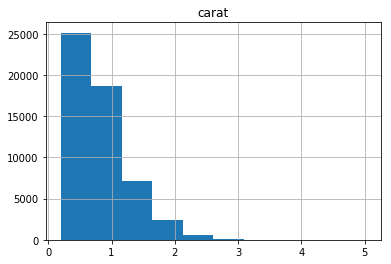

In [26]:
diamonds_df.hist(column='carat')

The y-axis in this plot denotes the number of diamonds in the dataset with the carat specification on the x-axis.

The hist function has a parameter called `bins`, which literally refers the number of equally-sized 'bins' into which the data points are divided. By default, the bins parameter is set to 10 in pandas. We can change this to a different number, if we wish.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a1b6e4780>]],
      dtype=object)

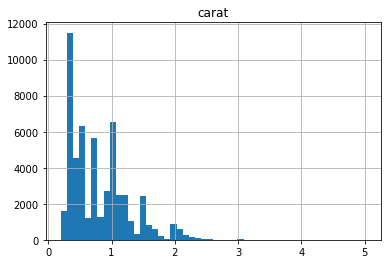

In [27]:
diamonds_df.hist(column='carat', bins=50)

This is a histogram with 50 bins. Notice how we can see more fine-grained distribution as we increase the number of bins. It is helpful to test with multiple bin sizes to know the exact distribution of the feature. The range of bin size varies from 1 (where all values are in the same bin) to the number of values (where each value of the feature is in one bin).

Now let's look at the same function using seaborn.

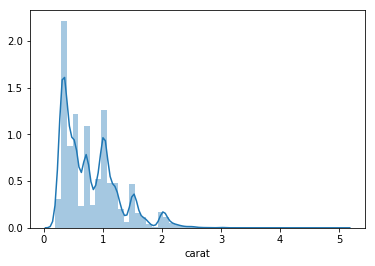

In [28]:
sns.distplot(diamonds_df.carat)

There are two noticeable differences between the pandas hist function and seaborn displot:
- pandas sets the `bins` parameter to a default of 10, but seaborn inferrs an appropriate bin size based on the statistical distribution of the dataset.
- by default, the distplot function also includes a smoothed curve over the histogram, called a kernel density estimation

The kernel density estimation (KDE) is a non-parametric way to estimate the probability density function of a random variable. Usually a KDE doesn’t tell anything more than what we can infer from the histogram itself. However, it is helpful while comparing multiple histograms on the same plot. If we want to remove the KDE and look at the histogram alone, we can use the parameter `kde=False`.

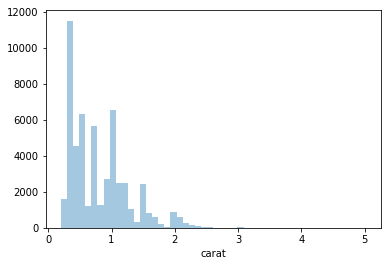

In [29]:
sns.distplot(diamonds_df.carat, kde=False)

Also note that the `bins` parameter seemed to render a more detailed plot when the bin size was increased from 10 to 50. Now, let's try to further increase it to 100.

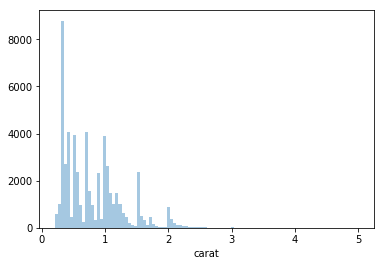

In [30]:
sns.distplot(diamonds_df.carat, kde=False, bins=100)

The histogram with 100 bins shows a better visualization of the distribution of the variable -- we see there are several 'peaks' at specific carat values. Another observation is that most `carat` values are concentrated towards lower values and the 'tail' is on the right -- in other words it is right skewed. 

A log transformation helps in identifying more trends. For instance, in the following graph, the x axis is log transformed values of the variable `price` and we see that there are two peaks indicating two kinds of diamonds -- one with a 'high' price and other with a 'low' price. 

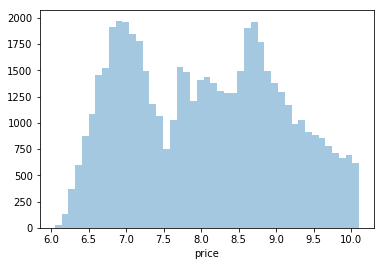

In [31]:
import numpy as np
sns.distplot(np.log(diamonds_df.price), kde=False)

That’s pretty neat. Looking at the histogram, even a naive viewer immediately gets a picture of the distribution of the feature. Specifically, three observations are important in a histogram:
- which feature values are more frequent in the dataset (in this case, there is a peak at around 6.8 and another peak between 8.5 and 9 - note that `log(price) = values` in this case, 
- how many 'peaks' exist in the data (the peaks need to be further inspected for possible causes in the context of the data) and 
- are there any outliers in the data

#### Bar plots

Another type of plots we look at in this lesson are bar plots.

What is a bar plot?: In their simplest form, `bar plots` display counts of categorical variables. More broadly, bar plots are used to depict the relationship between a categorical and a numerical variable. On the other hand, histograms are plots that show the statistical distribution of a continuous numerical feature. 

Let us see two examples of bar charts in the diamonds dataset. First, we shall present the count of diamonds of each cut quality that exists in the data. Second, we shall look at the price associated with the different types of cut quality (`Ideal`, `Good`, ..`Premium` etc.) in the dataset. We will use both pandas and seaborn to get a sense of how to use in-built plotting functions in both libraries.

Before generating the plots, let's look at the unique values in `cut` quality and `clarity` columns just to refresh our memory.

In [32]:
diamonds_df.cut.unique()

array(['Ideal', 'Premium', 'Good', 'Very Good', 'Fair'], dtype=object)

In [33]:
diamonds_df.clarity.unique()

array(['SI2', 'SI1', 'VS1', 'VS2', 'VVS2', 'VVS1', 'I1', 'IF'],
      dtype=object)

Note that `unique()` returns an array. There are 5 unique `cut` qualities and 8 unique values in `clarity`. Number of unique values can be obtained using `nunique()` in pandas.

To obtain the counts of diamonds in each cut quality, we first create a table using the pandas `crosstab()` function.

In [34]:
cut_count_table = pd.crosstab(index=diamonds_df['cut'],columns='count')
cut_count_table

col_0,count
cut,
Fair,1610
Good,4906
Ideal,21551
Premium,13791
Very Good,12082


Then, we pass these counts to a pandas function -- `plot(kind='bar')`.

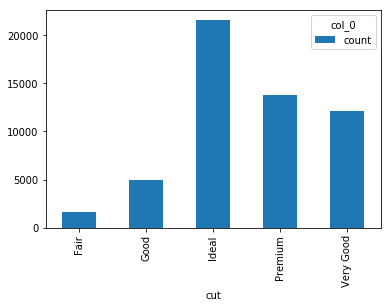

In [35]:
cut_count_table.plot(kind='bar')

We see that most of the diamonds in the dataset are Ideal cut quality, followed by Premium, Very Good, Good and Fair. Now, let's see how to generate the same plot using seaborn.

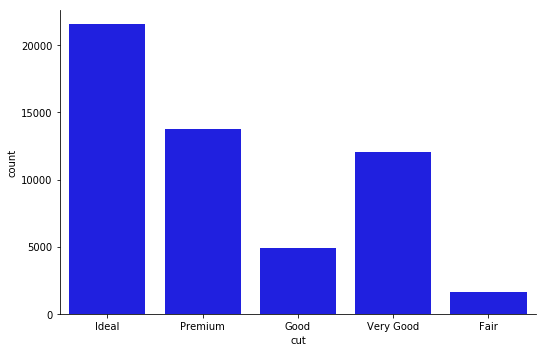

In [36]:
sns.catplot("cut", data=diamonds_df, aspect=1.5, kind="count", color="b")

Notice how the seaborn `catplot()` function does not require us to create the intermediate count table (using `pd.crosstab()`), and reduces one step in the plotting process.

Next, here is how we obtain the mean price distribution of different cut qualities using seaborn.

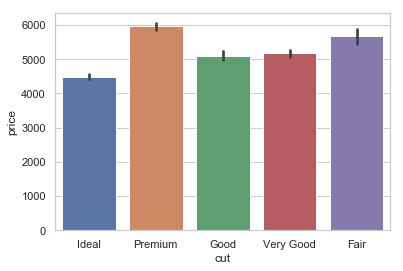

In [37]:
import seaborn as sns
from numpy import median, mean
sns.set(style="whitegrid")
ax = sns.barplot(x="cut", y="price", data=diamonds_df,estimator=mean)

Here, the black lines (`error bars`) on the rectangles indicate the uncertainity (or spreak of values) around the mean estimate. By default, this value is set to 95% Confidence. How do we change it? Use the parameter `ci=68`, for instance, to set it to 68%. We can also plot the standard deviation in the prices using `ci='sd'`.

We can also reorder x-axis bars using `order`.

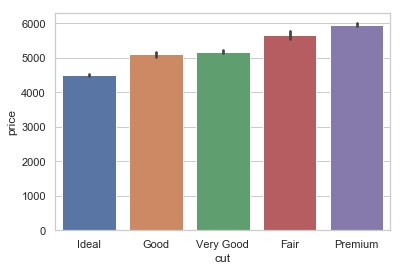

In [38]:
ax = sns.barplot(x="cut", y="price", data=diamonds_df, estimator=mean, ci=68, order=['Ideal','Good','Very Good','Fair','Premium'])

### Exercise: Creating barplots grouped by a specific feature

In this exercise, we will use the `diamonds` dataset to generate the distribution of prices with respect to `color` in each `cut` quality. In the example above, we have seen the price distribution of different cut quality diamonds. Now, we would like to look at the variation with each color. 

1. Import necessary modules, in this case only seaborn

In [39]:
#Import seaborn
import seaborn as sns

2. Load the dataset

In [40]:
diamonds_df = sns.load_dataset('diamonds')

Use the parameter `hue` to plot nested groups. 

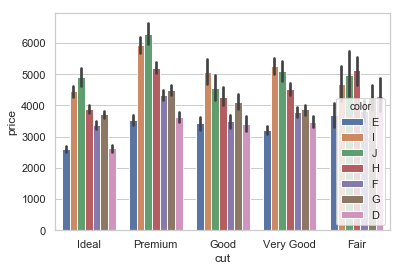

In [41]:
ax = sns.barplot(x="cut", y="price", hue='color', data=diamonds_df)

Grouped bar plots can be very useful for visualizing the variation of a particular feature within different groups. Here, we can observe that price patterns of diamods of different colors are similar in each cut quality. For instance, within `Ideal` diamonds, price distribution of diamonds of different colors is same as that within `Premium`, and other cut quality diamonds. 

### Tweaking plot parameters 

#### Manipulating Legends

Looking at the last figure in our previous section, we find that the legend is not appropriately placed. We can modify the legend properties with a simple addition in the code:

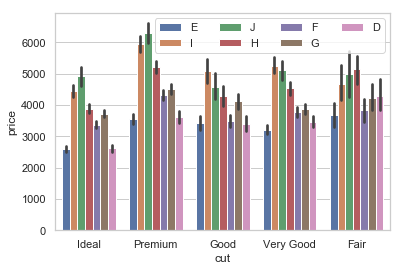

In [42]:
ax = sns.barplot(x='cut', y='price', hue='color', data=diamonds_df)
ax.legend(loc='upper right',ncol=4)

In the above `ax.legend()` call, parameter `ncol` denotes the number of columns into which values in the legend are to be organised and parameter `loc` specifies the location of legend which can take any of the 8 values -- for instance, `upper left`, `lower center` etc. 

#### Axis labels 

Now that we went over the legend function, let's look at the axis labels. How can we modify the labels on x- or y-axis? How can we change the fontsize? The code below shows you how:

Text(0, 0.5, 'Price')

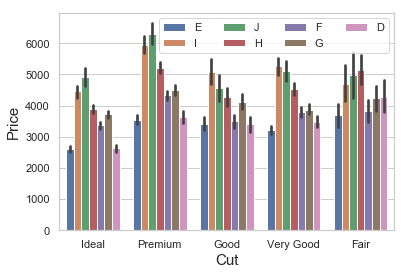

In [43]:
ax = sns.barplot(x='cut', y='price', hue='color', data=diamonds_df)
ax.legend(loc='upper right', ncol=4)
ax.set_xlabel('Cut', fontdict={'fontsize' : 15})
ax.set_ylabel('Price', fontdict={'fontsize' : 15})

So you see, that's how simple it is!

#### Tick labels

It is also possible to easily modify other properties of the x-axis or y-axis tick labels. Below is an example:

[Text(0, 0, 'Ideal'),
 Text(0, 0, 'Premium'),
 Text(0, 0, 'Good'),
 Text(0, 0, 'Very Good'),
 Text(0, 0, 'Fair')]

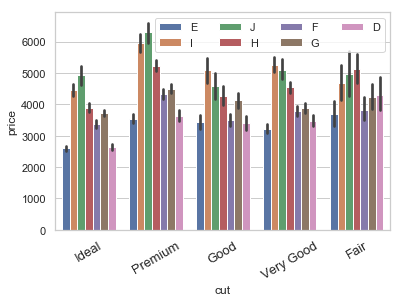

In [44]:
ax = sns.barplot(x='cut', y='price', hue='color', data=diamonds_df)
ax.legend(loc='upper right',ncol=4)
# set fontsize and rotation of x-axis tick labels
ax.set_xticklabels(ax.get_xticklabels(), fontsize=13, rotation=30)

The rotation feature is particularly useful when the tick-labels are long and crowd up on the x-axis. 

#### Annotations

Another useful feature to have in plots is the annotate feature. In the following illustration, we make a simple barplot more informative by adding some annotations. 

Suppose we want to add more information in the plot about 'ideal' cuts. We can do this with the following steps:

1. Import necessary modules

In [45]:
import matplotlib.pyplot as plt

2. Generate bar plot using seaborn's catplot function. 

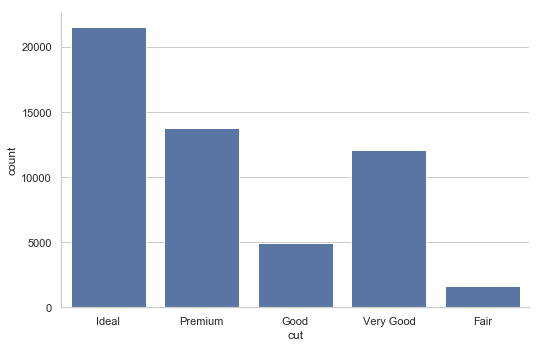

In [46]:
ax = sns.catplot("cut", data=diamonds_df, aspect=1.5, kind="count", color="b")

3. Annotate on the column belonging to `Ideal` category.

0
21551


Text(0.3, 23551, 'excellent polish and symmetry ratings;\nreflects almost all the light that enters it')

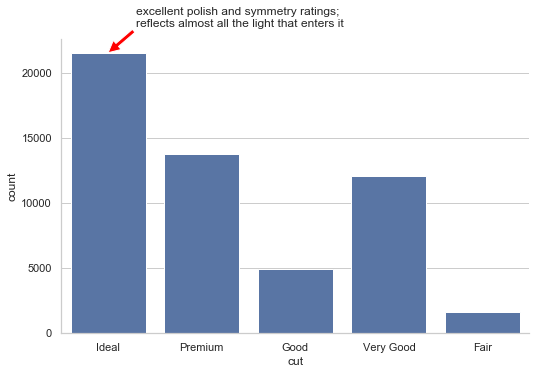

In [47]:
# get records in the dataframe corresponding to ideal cut
ideal_group = diamonds_df.loc[diamonds_df['cut']=='Ideal']

# get the location of x coordinate where the annotation has to be placed
x = ideal_group.index.tolist()[0]

# get the location of y coordinate where the annotation has to be placed
y = len(ideal_group)
print(x)
print(y)

# annotate the plot with any note or extra information
sns.catplot("cut", data=diamonds_df, aspect=1.5, kind="count", color="b")
plt.annotate('excellent polish and symmetry ratings;\nreflects almost all the light that enters it', xy=(x,y), xytext=(x+0.3, y+2000), arrowprops=dict(facecolor='red'))


Now there seem to be a lot of parameters in the annotate function, but worry not! [This](https://matplotlib.org/3.1.0/api/_as_gen/matplotlib.pyplot.annotate.html) official documentation has more details covered. For instance, `xy` parameter denotes the point (x,y) on the figure to annotate. `xytext` denotes position (x,y) to place the text at. If None, defaults to `xy`. Note: We added an offset of .3 for `x` and 2000 for `y` (since y is close to 20000) for readability of the text. The color of the arrow is specified using `arrowprops` parameter in the `annotate` function.

There are several other bells and whistles associated with visualisation libraries in python, some of which we will see as we progress in the course. At this stage, we will go through a chapter activity to revise the concepts in this chapter.

### Topic Summary

In this section, we saw how to generate two simple plots using seaborn and pandas - histograms and barplots.

<b>Histograms</b>: Histograms are useful for understanding the statistical distribution of a numerical feature in the given dataset. They can be generated using the hist() function in pandas and distplot() in seaborn.
    
<b>Bar plots</b>: Bar plots are useful for gaining insight into the values taken by a categorical feature in the given dataset. They can be generated using the plot(kind='bar') function in pandas and catplot(kind='count'), barplot() functions in seaborn

With the help of various considerations arising in the process of plotting these two types of visualization, we presented some basic concepts in data visualization:
- formatting legends to present labels for different elements in the plot: with 'loc' and other parameters in the legend function
- changing properties of tick labels: with fontsize, rotation and other parameters in the set_xticklabels() or set_yticklabels() functions
- adding annotations for additional information: with the annotate() function

### Assessment Questions

The y-axis on the histogram stands for:
- count of the features that take the value on x-axis
- count of the datapoints that take the feature value on x-axis
- probability that a feature takes the value on x-axis
- probability that there is a datapoint takes the feature value on x-axis

answer: b

Suppose we have a pandas dataframe with a specific categorical feature 'A'. We want to obtain a plot depicting the counts of records assume different values corresponding to feature 'A'. Which of the following are true?
- The bar plot can be obtained in seaborn using a function catplot(kind='count')
- The bar plot can be obtained in seaborn using a function barplot(kind='count')
- The bar plot can be obtained in pandas using the function plot(kind='bar') without any prior transformation of the dataframe
- The bar plot can be obtained in pandas using the function plot(kind='bar') without some prior transformation of the dataframe

answer: a, d

Which of the following statements is false?
- The number of columns in a plot legend can be changed using the parameter `ncol` in the legend function
- The rotation of ticklabels in a plot can be changed by setting the rotation parameter in the set_xticklabels to a certain angle
- The annotate function communicates additional relevant information regarding any element in the plot
- The legend function can be placed only in one of the four corners of a figure

answer: c

## Chapter-level Summary

In this chapter, we covered the basics of handling pandas dataframes to format them as inputs for different visualization functions in libraries like pandas, seaborn, etc., and some essential concepts in generating and modifying plots to create pleasing figures. 

The pandas library contains functions such as read_csv(), read_excel(), read_json() to read strctured text data files. Functions like describe(), info() are useful to get information on the summary statistics and memory usage of the features in the dataframe. Other important operations on pandas dataframes include subsetting based on user-specified conditions/constraints, adding new columns to a dataframe, transforming existing columns with built-in python functions as well as user-defined functions, deleting specific columns in a dataframe, and writing a modified dataframe to a file on the local system.

Once equipped with knowledge on these common operations on pandas dataframes, we went over the basics of visualization and notes on refining the visual appeal of the plots. We illustrated these concepts with the plotting of histograms and bar plots. Specifically, we learnt how to present different ways of presenting labels and legends, changing properties of tick labels, and adding annotations.

In the next chapter, we will learn to generate some popular visualization techniques and understand the interpretation, strengths, and limitations of each.

## Chapter-level Quiz

A histogram for a specific feature in a dataset is a useful plot for which of the following:
- to spot outliers
- to examine the statistical distribution of an individual feature
- to know which values are taken most frequently by the given feature
- all of the above

answer: d

The pandas function describe() reports which of the following:
- statistics for both numerical as well as categorical features 
- statistics for the numerical features but not categorical features
- statistics for the categorical features but not numerical features
- lcolumn types and how much memory a dataframe occupies

answer: b

Which of the following is wrong syntax?:
- df.shape()
- df.describe()
- df.info()
- df['feature_name'].unique()

answer: a 

## Chapter-level Activity

We’ll be working with the 120 years of [Olympic History dataset](https://github.com/abha-b/python_viz/blob/master/athlete_events.csv.zip) acquired by Randi Griffin from https://www.sports-reference.com/ and made available on the github repo of this course. Your assignment is to report which are the top 5 sports based on the largest number of medals awarded in the year 2016, and then perform the following analysis:
- Generate a plot indicating the number of medals awarded in each of the top 5 sports in 2016.
- Plot the graph depicting distribution of the age of medal-winners in the top 5 sports in 2016.
- Find out which country teams won the largest number of medals in the top 5 sports categories in 2016.
- Observe the trend in the average weight of male and female players winning in the top 5 sports categories in 2016.

### High-level steps:

1. Download the dataset, and format it as a pandas dataframe.
2. Filter the dataframe to only include the the rows corresponding to medal winners from year 2016. 
3. Find out the medals awarded in 2016 for each sport. 
4. List the top 5 sports based on largest number of medals awarded. Filter the dataframe one more time to only include the records for top 5 sports in the year 2016.
5. Generate a barplot of record counts corresponding to each of the top 5 sports.
6. Generate a histogram for the _Age_ feature of all medal-winners in the top 5 sports (2016).
7. Generate a barplot indicating how many medals were won by each country team in the top 5 sports in 2016.
8. Generate a barplot indicating the average weight of players, categorized based on gender, winning in the top 5 sports categories in 2016.

### Solution steps: 

1. Download the dataset hosted on the course github repository, and format it as a pandas dataframe.

In [48]:
# load necessary modules
import pandas as pd
import seaborn as sns
from numpy import median, mean

# download file 'athlete_events.csv' from course github repository: https://github.com/TrainingByPackt/Interactive-Data-Visualization-with-Python
# read the dataset as a pandas dataframe
olympics_df = pd.read_csv('/Users/chandrasg/Desktop/packt_python_viz/athlete_events.csv')

# preview dataframe
olympics_df.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


2. Filter the dataframe to contain only medal winners of the year 2016.

In [49]:
# filter the dataframe to contain medal winners only (for non-winners, the Medal feature is NaN)
# note use of the inplace parameter
olympics_winners = olympics_df.dropna(subset=['Medal'])
olympics_winners.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
37,15,Arvo Ossian Aaltonen,M,30.0,NaN,NaN,Finland,FIN,1920 Summer,1920,Summer,Antwerpen,Swimming,Swimming Men's 200 metres Breaststroke,Bronze
38,15,Arvo Ossian Aaltonen,M,30.0,NaN,NaN,Finland,FIN,1920 Summer,1920,Summer,Antwerpen,Swimming,Swimming Men's 400 metres Breaststroke,Bronze
40,16,Juhamatti Tapio Aaltonen,M,28.0,184.0,85.0,Finland,FIN,2014 Winter,2014,Winter,Sochi,Ice Hockey,Ice Hockey Men's Ice Hockey,Bronze
41,17,Paavo Johannes Aaltonen,M,28.0,175.0,64.0,Finland,FIN,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Individual All-Around,Bronze


3. Print the number of medals awarded in each Sport in 2016.

In [50]:
# print records for each value of the feature 'Sport'
olympics_winners_2016 = olympics_winners[(olympics_winners.Year == 2016)]
olympics_winners_2016.Sport.value_counts()

Athletics                192
Swimming                 191
Rowing                   144
Football                 106
Hockey                    99
Handball                  89
Cycling                   84
Canoeing                  82
Water Polo                78
Rugby Sevens              74
Volleyball                72
Basketball                72
Wrestling                 72
Gymnastics                66
Fencing                   65
Judo                      56
Boxing                    51
Shooting                  45
Equestrianism             45
Sailing                   45
Weightlifting             45
Diving                    36
Synchronized Swimming     32
Taekwondo                 32
Tennis                    24
Table Tennis              24
Archery                   24
Badminton                 24
Rhythmic Gymnastics       18
Beach Volleyball          12
Triathlon                  6
Modern Pentathlon          6
Trampolining               6
Golf                       6
Name: Sport, d

4. Note the top 5 sports based on largest number of medals awarded in the year 2016, create a dataframe to include only these sports.

In [51]:
# list the top 5 sports
top_sports = ['Athletics', 'Swimming', 'Rowing', 'Football', 'Hockey']

# subset the dataframe to include data from the top sports
olympics_top_sports_winners_2016 = olympics_winners_2016[(olympics_winners_2016.Sport.isin(top_sports))]
olympics_top_sports_winners_2016.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
158,62,Giovanni Abagnale,M,21.0,198.0,90.0,Italy,ITA,2016 Summer,2016,Summer,Rio de Janeiro,Rowing,Rowing Men's Coxless Pairs,Bronze
814,465,"Matthew ""Matt"" Abood",M,30.0,197.0,92.0,Australia,AUS,2016 Summer,2016,Summer,Rio de Janeiro,Swimming,Swimming Men's 4 x 100 metres Freestyle Relay,Bronze
1228,690,Chantal Achterberg,F,31.0,172.0,72.0,Netherlands,NED,2016 Summer,2016,Summer,Rio de Janeiro,Rowing,Rowing Women's Quadruple Sculls,Silver
1529,846,Valerie Kasanita Adams-Vili (-Price),F,31.0,193.0,120.0,New Zealand,NZL,2016 Summer,2016,Summer,Rio de Janeiro,Athletics,Athletics Women's Shot Put,Silver
1847,1017,Nathan Ghar-Jun Adrian,M,27.0,198.0,100.0,United States,USA,2016 Summer,2016,Summer,Rio de Janeiro,Swimming,Swimming Men's 50 metres Freestyle,Bronze


5. Generate a bar plot of 2016 medal-winners across the top 5 sports.

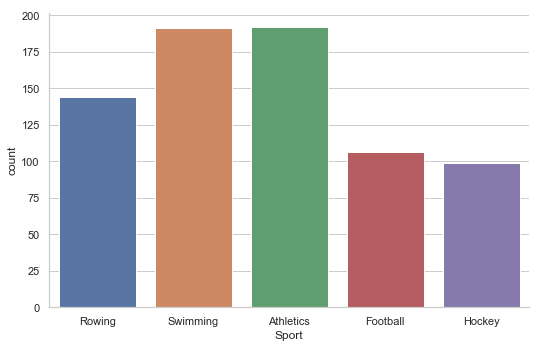

In [52]:
# generate bar plot indicating count of medals awarded in each of the top sports
g = sns.catplot('Sport', data=olympics_top_sports_winners_2016, kind="count", aspect=1.5)

6. Generate a histogram for the _Age_ feature of all players who played for the top 5 sports in 2016.

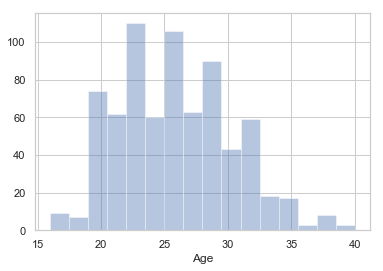

In [53]:
sns.distplot(olympics_top_sports_winners_2016.Age, kde=False)

While most medal winners are between 20-30 years of age, there are also medal winners who are exceptionally younger (~16 years) or older (~40 years).

7. Generate a barplot indicating the number of medals won by each country in the top 5 sports in 2016.

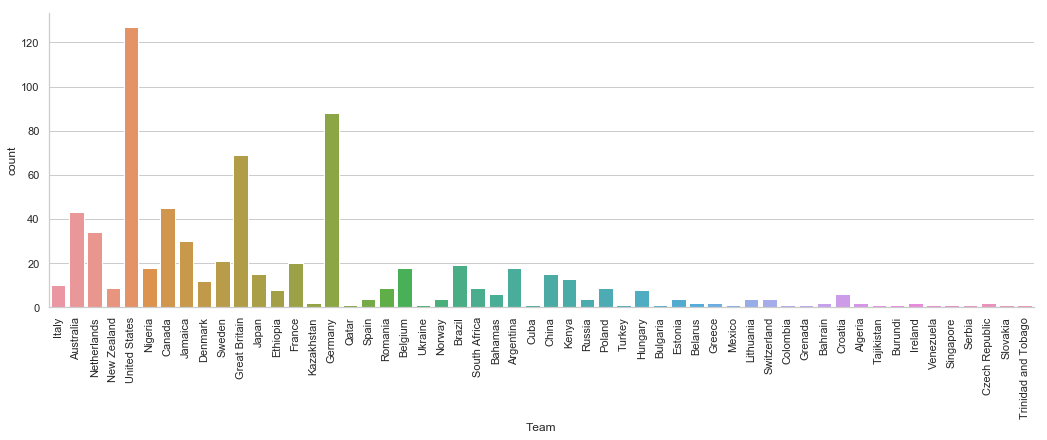

In [54]:
g = sns.catplot('Team', data=olympics_top_sports_winners_2016, kind="count", aspect=3)
g.set_xticklabels(rotation=90)

Considering the 5 sports, US has won the maximum number of medals, followed by Germany, Great Britain, Canada, and Australia.

8. Generate a barplot indicating the average weight of players, categorized as male and female, winning in the top 5 sports categories in 2016.

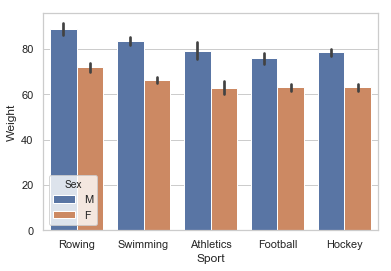

In [55]:
sns.set(style="whitegrid")
sns.barplot(x="Sport", y="Weight", data=olympics_top_sports_winners_2016, estimator=mean, hue='Sex')

The bar plot indicates high player weight in Rowing, followed by Swimming, and then the other remaining sports. The trend is similar across both male and female players.